In [1]:
%load_ext autoreload
%autoreload 2
%cd ..
from pathlib import Path
from utils.loadmat import loadmat
from utils.check_dict import check_dict

c:\Users\remus\Documents\Development\SuiteHeartUtils


In [13]:
from utils.suiteHeart_to_StrainNet import prepare_StrainNet_data_from_SuiteHeart
# cine_mat_fname = Path('./debug_data/all_AUTO_FUNCTION_1_102.mat')
cine_mat_fname = Path('./debug_data/trufi_cine_sa_p2_8.mat')
cine_valid_slices = \
    prepare_StrainNet_data_from_SuiteHeart(
        cine_mat_fname,
        target_pixel_resolution = '1x1', # '1x1', 'ori' or arbitrary float number
        target_image_shape = (128,128))  # image size after resampling and cropping
check_dict(cine_valid_slices[0])

patient_name                             Carter, Rita        
cine_slice_idx                           0                   
cine_slice_name                          Carter, Rita-0      
cine_slice_mat_filename                  debug_data\trufi_cine_sa_p2_8.mat
cine_slice_has_contour                   True                
cine_lv_epi_contour                      (20,)               
cine_lv_endo_contour                     (20,)               
cine_cropped_images                      (128, 128, 20)      
cine_cropped_myocardium_masks            (128, 128, 20)      
cine_rv_insertion_points                 (2,)                
cine_frame_time_stamps                   (20,)               


Text(0.5, 1.0, 'cine_cropped_images')

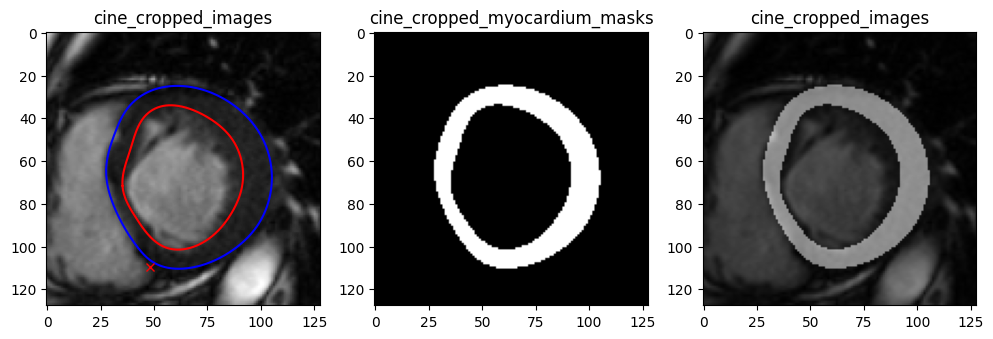

In [7]:
check_slice_idx = 0
check_frame_idx = 10

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

vis_lv_epi_contour = cine_valid_slices[check_slice_idx]['cine_lv_epi_contour'][check_frame_idx]# - np.array([cine_slices[check_slice_idx]['cine_cropped_myocardium_masks_bbox'][2], cine_slices[check_slice_idx]['cine_cropped_myocardium_masks_bbox'][0]])
vis_lv_endo_contour = cine_valid_slices[check_slice_idx]['cine_lv_endo_contour'][check_frame_idx]# - np.array([cine_slices[check_slice_idx]['cine_cropped_myocardium_masks_bbox'][2], cine_slices[check_slice_idx]['cine_cropped_myocardium_masks_bbox'][0]])
vis_rv_insertion_point = cine_valid_slices[check_slice_idx]['cine_rv_insertion_points']#[check_frame_idx]

axs[0].imshow(cine_valid_slices[check_slice_idx]['cine_cropped_images'][..., check_frame_idx], cmap='gray')
axs[0].set_title('cine_cropped_images')
axs[0].plot(vis_lv_epi_contour[:,0], vis_lv_epi_contour[:,1], 'b')
axs[0].plot(vis_lv_endo_contour[:,0], vis_lv_endo_contour[:,1], 'r')
axs[0].plot(vis_rv_insertion_point[0], vis_rv_insertion_point[1], 'rx')
axs[1].imshow(cine_valid_slices[check_slice_idx]['cine_cropped_myocardium_masks'][..., check_frame_idx], cmap='gray')
axs[1].set_title('cine_cropped_myocardium_masks')
axs[2].imshow(cine_valid_slices[check_slice_idx]['cine_cropped_images'][..., check_frame_idx], cmap='gray')
axs[2].imshow(cine_valid_slices[check_slice_idx]['cine_cropped_myocardium_masks'][..., check_frame_idx], cmap='gray', alpha=0.5)
axs[2].set_title('cine_cropped_images')